# Det kræver at have følgende filer :
"cleaned_dataset_FULL" ,"train_data.csv" og
"vocabulary_10000.csv"


Læser "cleaned_dataset_FULL.csv"

In [1]:
import pandas as pd
DATA_FILE ="cleaned_dataset_FULL.csv"
df = pd.read_csv(DATA_FILE, low_memory=False)
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,cleaned content
0,7444726.0,nationalreview.com,political,http://www.nationalreview.com/node/152734/%E2%...,Plus one article on Google Plus\n\n(Thanks to ...,2017-11-27T01:14:42.983556,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Iran News Round Up,NaN,NaN,"['National Review', 'National Review Online', ...",NaN,NaN,NaN,NaN,"['plu', 'one', 'articl', 'googl', 'plu', 'than..."
1,6213642.0,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2012/06/the-c...,The Cost Of The Best Senate Banking Committee ...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,The Cost Of The Best Senate Banking Committee ...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"['cost', 'best', 'senat', 'bank', 'committe', ..."
2,3867639.0,dailycurrant.com,satire,http://dailycurrant.com/2016/01/18/man-awoken-...,Man Awoken From 27-Year Coma Commits Suicide A...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Man Awoken From 27-Year Coma Commits Suicide A...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"['man', 'awoken', '<NUM>', 'year', 'coma', 'co..."
3,9560791.0,nytimes.com,reliable,https://query.nytimes.com/gst/fullpage.html?re...,WHEN Julia Geist was asked to draw a picture o...,2018-02-11 00:46:42.632962,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Opening a Gateway for Girls to Enter the Compu...,NaN,NaN,"['Computers and the Internet', 'Women and Girl...",WHEN Julia Geist was asked to draw a picture o...,NaN,NaN,nytimes,"['julia', 'geist', 'ask', 'draw', 'pictur', 'c..."
4,2059625.0,infiniteunknown.net,conspiracy,http://www.infiniteunknown.net/2011/09/14/100-...,– 100 Compiled Studies on Vaccine Dangers (Act...,2017-11-10T11:18:44.524042,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,100 Compiled Studies on Vaccine Dangers – Infi...,NaN,NaN,[''],NaN,"Lymphoma, Hepatitis B, Immune System, Health, ...",NaN,NaN,"['<NUM>', 'compil', 'studi', 'vaccin', 'danger..."


Task 4: Split the resulting dataset into a training, validation, and test splits. A common strategy is to uniformly at random split the data 80% / 10% /
10%. You will use the training data to train your baseline and advanced models, the validation data can be used for model selection and
hyperparameter tuning, while the test data should only be used in Part 4.


Dette program opdeler et renset nyhedsdata-sæt i 80% træning, 10% validering og 10% test ved hjælp af StratifiedShuffleSplit. Det sikrer, at fordelingen af nyhedstyper bevares i alle datasæt, hvilket forbedrer modelens præcision.

# Vi tejkker om der kolonner i dataset.

In [2]:
print(df.columns)
print("\n", df['type'].unique())


Index(['id', 'domain', 'type', 'url', 'content', 'scraped_at', 'inserted_at',
       'updated_at', 'title', 'authors', 'keywords', 'meta_keywords',
       'meta_description', 'tags', 'summary', 'source', 'cleaned content'],
      dtype='object')

 ['political' 'fake' 'satire' 'reliable' 'conspiracy' 'unreliable' 'bias'
 'rumor' 'unknown' nan 'clickbait' 'hate' 'junksci'
 '2018-02-10 13:43:39.521661']


# Fjern mellemrum i kolonnenavne 
# Fjern rækker med NaN i 'cleaned content' og 'type'

In [3]:

#vi fejner NaNa 
df.columns =df.columns.str.strip()
df = df.dropna(subset=['cleaned content', 'type'])


# Vi vill gerne kigge, hviklet kalsser eller kategorier vi har i vorses dat: 

In [4]:
X = df["cleaned content"]  # Features (tekst)
y = df["type"]  # Labels (kategori af nyheder)
# Find klasser med færre end 2 observationer
counts = y.value_counts()
classes_to_remove = counts[counts < 2].index
mask = ~y.isin(classes_to_remove)

X = X[mask]
y = y[mask]

print(y.value_counts())

type
reliable      218563
political     194518
bias          133232
fake          104883
conspiracy     97314
rumor          56445
unknown        43534
unreliable     35332
clickbait      27412
junksci        14040
satire         13160
hate            8779
Name: count, dtype: int64


In [5]:

# Definer `X` og `y`
X = df["cleaned content"]  # Features (tekst)
y =df["type"]  # Labels (kategori af nyheder)

print(f"Antal rækker i X: {len(X)}")
print(f"Antal labels i y: {len(y)}")

print(f"Antal rækker i X: {len(X)}")
print(f"Antal labels i y: {len(y)}")

print(y.value_counts())  



Antal rækker i X: 947213
Antal labels i y: 947213
Antal rækker i X: 947213
Antal labels i y: 947213
type
reliable                      218563
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64


Definer `X` og `y`

In [ ]:
X = df["cleaned content"]  # Features (tekst)
y = df["type"]  # Labels (kategori af nyheder)
# Find klasser med færre end 2 observationer
counts = y.value_counts()
classes_to_remove = counts[counts < 2].index
mask = ~y.isin(classes_to_remove)

X = X[mask]
y = y[mask]


# Vi havede en problem med en ekstrer dater, nu har fiejnt

In [7]:
print(y.value_counts())  # Tæl hvor mange gange hver klasse optræder


type
reliable      218563
political     194518
bias          133232
fake          104883
conspiracy     97314
rumor          56445
unknown        43534
unreliable     35332
clickbait      27412
junksci        14040
satire         13160
hate            8779
Name: count, dtype: int64


# OPdeling af database

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

# Opret StratifiedShuffleSplit objekt
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, temp_index in split.split(X, y):
    X_train, X_temp = X.iloc[train_index], X.iloc[temp_index]
    y_train, y_temp = y.iloc[train_index], y.iloc[temp_index]
    

# Størrelsen på splits
print(f"Dataerne der brugt for triaaning, som svar til 80: {len(X_train)}")
print(f"Dataerne der blive brugt for (validering+ test): {len(X_temp)} rækker")



# Opret StratifiedShuffleSplit objekt
split= StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in split.split(X_temp, y_temp):
    X_val, X_test = X_temp.iloc[val_index], X_temp.iloc[test_index]
    y_val, y_test = y_temp.iloc[val_index], y_temp.iloc[test_index]

# Størrelsen på splits
print(f"Dataerne der brugt for validering (10%): {len(X_val)} rækker")
print(f"Dataerne der blive brugt for test (10%): {len(X_test)} rækker")

Dataerne der brugt for triaaning, som svar til 80: 757769
Dataerne der blive brugt for (validering+ test): 189443 rækker
Dataerne der brugt for validering (10%): 94721 rækker
Dataerne der blive brugt for test (10%): 94722 rækker


# Hvorfor har vi køret det? fordi vi kunne ikke tæller op de orderne. Dvs at rækkerne var strang og vi kunne ikke kunveret den till metrix.

In [9]:
import pandas as pd
from collections import Counter

df = pd.read_csv("train_data.csv")
df["text"] = df["text"].fillna("").astype(str)

# Saml al tekst og split til en liste af ord
all_words = " ".join(df["text"]).split()

# Tæl alle ord
word_counts = Counter(all_words)
word_freq_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])

# Sortér efter de mest hyppige ord
word_freq_df = word_freq_df.sort_values(by="count", ascending=False)
word_freq_df = word_freq_df.head(10000)
word_freq_df.to_csv("vocabulary_10000.csv", index=False, encoding="utf-8")

print(" Fil gemt: vocabulary_10000.csv")


 Fil gemt: vocabulary_10000.csv


# De mest 20 mest almindelige ord i trning set

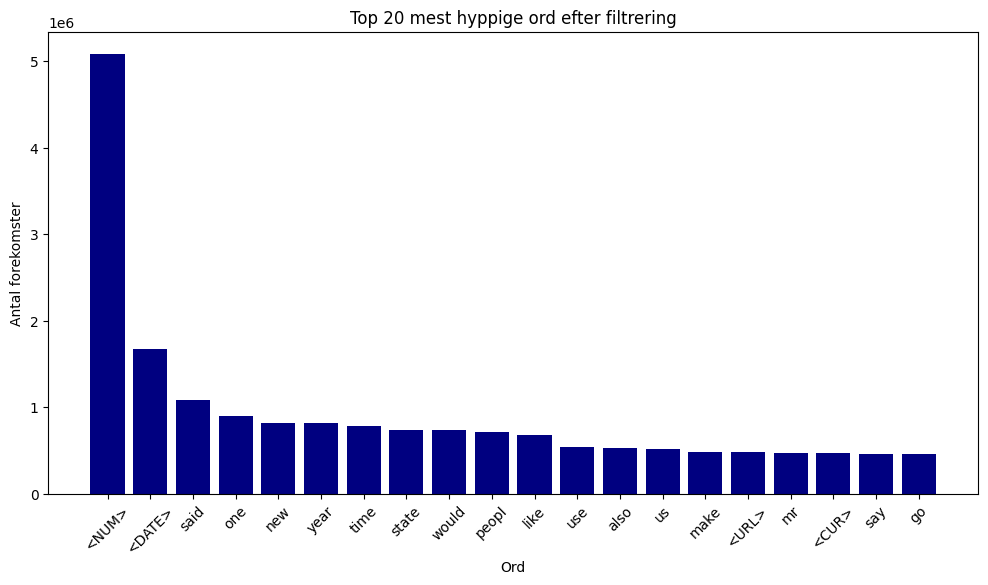

In [45]:
import matplotlib.pyplot as plt

# Indlæs den filtrerede version
df_vocab = pd.read_csv("vocabulary_10000.csv")

# Vælg de 20 mest hyppige ord
top_words = df_vocab.head(20)

# Plot en bar-chart
plt.figure(figsize=(12, 6))
plt.bar(top_words["word"], top_words["count"], color="navy")
plt.xlabel("Ord")
plt.ylabel("Antal forekomster")
plt.title("Top 20 mest hyppige ord efter filtrering")
plt.xticks(rotation=45)
plt.show()


# Start by implementing and training a simple logistic regression classifier using a fixed vocabulary of the 10,000 most frequent words extracted from the content field, as the input features.


In [ ]:
import pandas as pd

# Indlæs ordforrådet
fixed_vocab_df = pd.read_csv("vocabulary_10000.csv")

# Fjern NaN værdier
fixed_vocab_df = fixed_vocab_df.dropna(subset=["word"])

# Tjek igen, om der er store bogstaver
upper_case_words = fixed_vocab_df[fixed_vocab_df["word"].str.contains(r'[A-Z]')]

print(" Antal ord med store bogstaver:", len(upper_case_words))
print(upper_case_words.head(10))  # Se de første 10 ord


 Antal ord med store bogstaver: 0
Empty DataFrame
Columns: [word, count]
Index: []


# Task 1:
Task 1: Start by implementing and training a simple logistic regression classifier using a fixed vocabulary of the 10,000 most frequent words extracted from the content field, as the input features. You do not need to apply TF-IDF weighting to the features. It should take no more than five minutes to fit this model on a modern laptop, and, as guidance, it should be possible to achieve an F1 score of ~94% on your test split. However, this F1 score is based on certain assumptions about how you have split your data and will not apply to every group. Do not worry too much if the F1 score with your logistic regression model is substantially below 94%. Write in your report the performance that you achieve with your implementation of this model, and remember to report any hyper-parameters used for the training process.

# Indlæs datasæt

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import joblib

df = pd.read_csv("cleaned_dataset_FULL.csv", usecols=["cleaned content", "type"])

# Fjern NaN-værdier i 'cleaned content' og 'type'-kolonnen
df = df.dropna(subset=["cleaned content", "type"])


# Konverter til string og lav alt lowercase

In [13]:
df["cleaned content"] = df["cleaned content"].astype(str).str.lower()

# Fjern ukendte og ubrugelige labels
df = df[df["type"] != "unknown"] 
df = df[df["type"] != "unreliable"]

# Korrekt mapping af labels
class_mapping = {
    "fake": "fake", "satire": "fake", "conspiracy": "fake", "junksci": "fake",
    "bias": "fake", "rumor": "fake", "state": "fake", "hate": "fake",  

    "reliable": "reliable",
    "clickbait": "reliable",  
    "political": "reliable"
}

df["type"] = df["type"].map(class_mapping)
df = df.dropna(subset=["type"])

print("\nUnikke labels efter mapping:", df["type"].unique())


Unikke labels efter mapping: ['reliable' 'fake']


# Indlæs de 10.000 mest hyppige ord og gør dem lowercase

In [14]:
fixed_vocab = pd.read_csv("vocabulary_10000.csv")["word"].str.lower().tolist()

# Konverter tekst til numeriske features med CountVectorizer
vectorizer = CountVectorizer(vocabulary=fixed_vocab, lowercase=False)
X = vectorizer.fit_transform(df["cleaned content"])
y = df["type"]

# Opdel data i træning (80%), validering (10%) og test (10%)

In [15]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Gem data til brug i modellen
dataset = {
    "X_train": X_train, "y_train": y_train,
    "X_val": X_val, "y_val": y_val,
    "X_test": X_test, "y_test": y_test,
    "vectorizer": vectorizer
}

joblib.dump(dataset, "dataset.pkl")
print("\n Datasæt gemt og klar til modellering!")


 Datasæt gemt og klar til modellering!


# Træning data task 1

In [16]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Indlæs det gemte datasæt
dataset = joblib.load("dataset.pkl")
X_train, y_train = dataset["X_train"], dataset["y_train"]
X_val, y_val = dataset["X_val"], dataset["y_val"]
X_test, y_test = dataset["X_test"], dataset["y_test"]
vectorizer = dataset["vectorizer"]

# 8. Træn logistisk regressionsmodel

In [ ]:

model = LogisticRegression(max_iter=5000, solver="saga", n_jobs=-1, random_state=42)
print("Træner modellen...")
model.fit(X_train, y_train)
print("Modellen er trænet!")

joblib.dump(model, "logistic_regression_model.pkl")
print("Modellen er gemt.")


Træner modellen...
Modellen er trænet!
Modellen er gemt.


# 10. Evaluer på valideringssættet

In [74]:

y_val_pred = model.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average="weighted")
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"F1-score på valideringssættet: {f1_val:.4f}")
print(f"Nøjagtighed på valideringssættet: {accuracy_val:.4f}")
print("\nKlassifikationsrapport for valideringssættet:\n", classification_report(y_val, y_val_pred))

# 11. Evaluer på test-sættet
y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average="weighted")
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"F1-score på test-sættet: {f1_test:.4f}")
print(f"Nøjagtighed på test-sættet: {accuracy_test:.4f}")
print("\nKlassifikationsrapport for test-sættet:\n", classification_report(y_test, y_test_pred))


F1-score på valideringssættet: 0.8517
Nøjagtighed på valideringssættet: 0.8517

Klassifikationsrapport for valideringssættet:
               precision    recall  f1-score   support

        fake       0.84      0.86      0.85     42785
    reliable       0.86      0.84      0.85     44050

    accuracy                           0.85     86835
   macro avg       0.85      0.85      0.85     86835
weighted avg       0.85      0.85      0.85     86835

F1-score på test-sættet: 0.8527
Nøjagtighed på test-sættet: 0.8527

Klassifikationsrapport for test-sættet:
               precision    recall  f1-score   support

        fake       0.84      0.86      0.85     42786
    reliable       0.86      0.84      0.85     44049

    accuracy                           0.85     86835
   macro avg       0.85      0.85      0.85     86835
weighted avg       0.85      0.85      0.85     86835



# Task 2
Task 2: Consider whether it would make sense to include meta-data features as well. If so, which ones, and why? If relevant, report the performance when including these additional features and compare it to the first baselines. Discuss whether these results match your expectations.

# Indlæser vi kun de nødvendige kolonner fra dataset

In [ ]:
# Indlæs data med nødvendige kolonner
df = pd.read_csv("cleaned_dataset_FULL.csv", usecols=["cleaned content", "type", "title", "authors", "domain"])
df = df.dropna(subset=["cleaned content", "type", "title", "domain"])


# Korrekt mapping af labels til kun to klasser

In [30]:
# Fjern ukendte og ubrugelige labels
df = df[df["type"] != "unknown"] 
df = df[df["type"] != "unreliable"]

# Fjern duplikate titler
df = df.drop_duplicates(subset=["title"], keep="first")

text_cols = ["cleaned content", "title", "domain", "authors"]
for col in text_cols:
    df[col] = df[col].astype(str).str.lower()

df["author_present"] = df["authors"].notnull().astype(int)
df["authors"] = df["authors"].fillna("unknown")

df["title_length"] = df["title"].apply(lambda x: len(x.split()))

class_mapping = {
    "fake": "fake", "satire": "fake", "conspiracy": "fake", "junksci": "fake",
    "bias": "fake", "rumor": "fake", "state": "fake", "hate": "fake",  
    "reliable": "reliable",
    "clickbait": "reliable",  
    "political": "reliable"
}

df = df[df["type"].isin(class_mapping.keys())] 
df["type"] = df["type"].map(class_mapping)

# Tjek at kun "fake" og "reliable" findes nu
print("\nUnikke labels efter mapping:", df["type"].unique())
print("\nAntal rækker efter rensning:", len(df))


Unikke labels efter mapping: ['reliable' 'fake']

Antal rækker efter rensning: 751147


# Vectorize artikeltekst med 10000 konstant ord

In [ ]:
fixed_vocab = pd.read_csv("vocabulary_10000.csv")["word"].str.lower().tolist()
vectorizer = CountVectorizer(vocabulary=fixed_vocab, lowercase=False, ngram_range=(1, 2))
X_content = vectorizer.fit_transform(df["cleaned content"])
y = df["type"]

# Vectorizer af daterne og kombiner alle features 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack, csr_matrix

domain_vectorizer = CountVectorizer(lowercase=True)
X_domain = domain_vectorizer.fit_transform(df["domain"])

author_vectorizer = CountVectorizer(lowercase=True)
X_author = author_vectorizer.fit_transform(df["authors"])

X_title_length = csr_matrix(df[["title_length"]].values)

X_full = hstack([X_content, X_domain, X_author, X_title_length])


# Spliterr date

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, temp_index in sss1.split(X_full, y):
    X_train, X_temp = X_full[train_index], X_full[temp_index]
    y_train, y_temp = y.iloc[train_index], y.iloc[temp_index]

sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for val_index, test_index in sss2.split(X_temp, y_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp.iloc[val_index], y_temp.iloc[test_index]




# Vectorizer til domain, domain titl

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import CountVectorizer


domain_vectorizer = CountVectorizer(lowercase=True)
X_domain = domain_vectorizer.fit_transform(df["domain"])

author_vectorizer = CountVectorizer(lowercase=True)
XX_author = author_vectorizer.fit_transform(df["authors"]) 
X_author_present = csr_matrix(df["author_present"].values.reshape(-1, 1))

X_title_length = csr_matrix(df[["title_length"]].values)

# Kombiner alle features i én samlet sparse matrix
X_full = hstack([X_content, X_domain, X_author, X_title_length])



# Træning model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib

# Træn Logistic Regression-modellen
model_meta = LogisticRegression(max_iter=5000, solver="saga", n_jobs=-1, random_state=42)
print("Træner modellen med metadata...")
model_meta.fit(X_train, y_train)
print("Modellen er trænet!")

Træner modellen med metadata...
Modellen er trænet!


In [54]:
y_val_pred = model_meta.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average="weighted")
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"\nF1-score (validering): {f1_val:.4f}")
print(f"Nøjagtighed (validering): {accuracy_val:.4f}")
print(classification_report(y_val, y_val_pred))
# Evaluér på testsættet
y_test_pred = model_meta.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average="weighted")
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nF1-score (test): {f1_test:.4f}")
print(f"Nøjagtighed (test): {accuracy_test:.4f}")
print(classification_report(y_test, y_test_pred))

# Gem evt. modellen
joblib.dump(model_meta, "logistic_regression_model_metadata.pkl")


F1-score (validering): 0.9649
Nøjagtighed (validering): 0.9649
              precision    recall  f1-score   support

        fake       0.96      0.98      0.97     38299
    reliable       0.97      0.95      0.96     36816

    accuracy                           0.96     75115
   macro avg       0.97      0.96      0.96     75115
weighted avg       0.97      0.96      0.96     75115


F1-score (test): 0.9640
Nøjagtighed (test): 0.9640
              precision    recall  f1-score   support

        fake       0.95      0.98      0.97     38299
    reliable       0.97      0.95      0.96     36816

    accuracy                           0.96     75115
   macro avg       0.96      0.96      0.96     75115
weighted avg       0.96      0.96      0.96     75115



['logistic_regression_model_metadata.pkl']

# Task 3

# Vi læser ny tata

Læser data fra "cleaned_bbc_articles_FULL.csv"

In [ ]:
import pandas as pd
from scipy.sparse import vstack, csr_matrix
from sklearn.utils import resample


df_bbc = pd.read_csv("cleaned_bbc_articles_FULL.csv")
df_bbc["title"] = df_bbc["headline"].fillna("")
df_bbc["authors"] = df_bbc["author"].fillna("unknown")  
df_bbc["type"] = "reliable"

Tilføje metadata

In [ ]:
df_bbc["title"] = df_bbc["title"].astype(str).str.lower()
df_bbc["authors"] = df_bbc["authors"].astype(str).str.lower()

df_bbc["title_length"] = df_bbc["title"].apply(lambda x: len(x.split()))
df_bbc["author_present"] = df_bbc["authors"].ne("unknown").astype(int)

#Brug Task 2's vectorizers direkte
X_bbc_text = vectorizer.transform(df_bbc["title"] + " " + df_bbc["content"])  # Titel + indhold
X_bbc_domain = domain_vectorizer.transform(df_bbc["domain"])
X_bbc_author = author_vectorizer.transform(df_bbc["authors"])
X_bbc_title_len = csr_matrix(df_bbc[["title_length"]].values)


Kombiner features i samme rækkefølge

In [ ]:
X_bbc = hstack([X_bbc_text, X_bbc_domain, X_bbc_author, X_bbc_title_len])


n_fake = sum(y_train == "fake")
X_bbc_balanced, y_bbc_balanced = resample(
    X_bbc,
    df_bbc["type"],
    n_samples=min(n_fake, len(df_bbc)),  
    random_state=42
)

# Kombiner med Task 2-data
X_train_final = vstack([X_train, X_bbc_balanced])
y_train_final = pd.concat([y_train, y_bbc_balanced])

Træne data

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(
    max_iter=1000,        
    solver='lbfgs',       
    C=0.8,              
    random_state=42,     
    n_jobs=-1            
)


print("Træner den endelige model...")
model.fit(X_train_final, y_train_final)
print("Træning fuldført!")

Træner den endelige model...


python(80364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(80365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(80366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(80367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(80369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(80370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Træning fuldført!


Evaluér på testdata

In [44]:
import numpy as np
print("\nEvaluering på test-sæt:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


print("\nModel-detaljer:")
print(f"Antal træningseksempler: {X_train_final.shape[0]}")
print(f"Klassefordeling (fake/reliable): {np.unique(y_train_final, return_counts=True)[1]}")
print(f"Antal features: {X_train_final.shape[1]}")


Evaluering på test-sæt:
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     38299
    reliable       1.00      1.00      1.00     36816

    accuracy                           1.00     75115
   macro avg       1.00      1.00      1.00     75115
weighted avg       1.00      1.00      1.00     75115


Model-detaljer:
Antal træningseksempler: 601774
Klassefordeling (fake/reliable): [306388 295386]
Antal features: 56853
